In [1]:
#importing important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'/content/Autism.csv')
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation
0,1,1,1,0,0,1,1,0,0,1,...,15.599481,m,White-European,yes,no,India,no,12.399055,18 and more,Self
1,2,1,0,0,0,0,0,0,1,0,...,27.181099,m,Asian,no,no,Mexico,no,6.551598,18 and more,Self
2,3,1,1,1,0,1,1,0,1,1,...,31.643906,m,White-European,yes,no,Egypt,no,3.180663,18 and more,Self
3,4,0,0,0,0,0,0,0,0,0,...,25.369210,m,?,no,no,India,no,2.220766,18 and more,Self
4,5,0,0,0,1,0,0,0,0,0,...,9.078580,m,?,no,no,Italy,no,7.252028,18 and more,Self


In [3]:
df.shape

(200, 21)

In [4]:
df.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation'],
      dtype='object')

In [5]:
#we have a typo in autism column, it should be autism instead of austim
df = df.rename(columns={'austim':'autism'})
df.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'autism', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               200 non-null    int64  
 1   A1_Score         200 non-null    int64  
 2   A2_Score         200 non-null    int64  
 3   A3_Score         200 non-null    int64  
 4   A4_Score         200 non-null    int64  
 5   A5_Score         200 non-null    int64  
 6   A6_Score         200 non-null    int64  
 7   A7_Score         200 non-null    int64  
 8   A8_Score         200 non-null    int64  
 9   A9_Score         200 non-null    int64  
 10  A10_Score        200 non-null    int64  
 11  age              200 non-null    float64
 12  gender           200 non-null    object 
 13  ethnicity        200 non-null    object 
 14  jaundice         200 non-null    object 
 15  autism           200 non-null    object 
 16  contry_of_res    200 non-null    object 
 17  used_app_before 

In [7]:
df.isnull().sum()

,0
ID,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,200.0,100.500000,57.879185,1.000000,50.750000,100.500000,150.250000,200.000000
A1_Score,200.0,0.575000,0.495584,0.000000,0.000000,1.000000,1.000000,1.000000
A2_Score,200.0,0.555000,0.498213,0.000000,0.000000,1.000000,1.000000,1.000000
A3_Score,200.0,0.475000,0.500628,0.000000,0.000000,0.000000,1.000000,1.000000
A4_Score,200.0,0.425000,0.495584,0.000000,0.000000,0.000000,1.000000,1.000000
A5_Score,200.0,0.450000,0.498742,0.000000,0.000000,0.000000,1.000000,1.000000
A6_Score,200.0,0.340000,0.474898,0.000000,0.000000,0.000000,1.000000,1.000000
A7_Score,200.0,0.420000,0.494797,0.000000,0.000000,0.000000,1.000000,1.000000
A8_Score,200.0,0.545000,0.499220,0.000000,0.000000,1.000000,1.000000,1.000000
A9_Score,200.0,0.540000,0.499648,0.000000,0.000000,1.000000,1.000000,1.000000


In [9]:
#Data Cleaning
df['ethnicity'].value_counts()

,count
ethnicity,
White-European,66
?,54
Middle Eastern,27
Asian,17
South Asian,9
Pasifika,8
Others,7
Latino,4
Turkish,3


We have some rows with '?' same as null also implies 'others'

In [10]:
df['relation'].value_counts()

,count
relation,
Self,180
Parent,8
?,6
Relative,2
Others,2
Health care professional,2


In [11]:
df = df.replace({'yes':1, 'no':0, '?':'Others', 'others':'Others'})

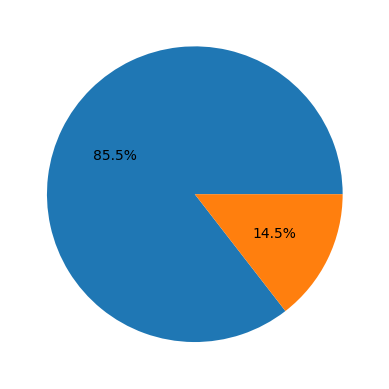

In [12]:
#EDA
plt.pie(df['autism'].value_counts().values, autopct='%1.1f%%')
plt.show()

We can see the dataset is highly imbalanced, currently we'll be using this only for training and if it performs terribly then we'll decide to do something about it

In [13]:
#lets separate columns by their types
ints, objects, floats = [], [], []
for col in df.columns:
  if df[col].dtype == 'int':
    ints.append(col)
  if df[col].dtype == 'float':
    floats.append(col)
  if df[col].dtype == 'object':
    objects.append(col)

In [14]:
print('Interger Columns are : ',ints)
print('Float Columns are : ',floats)
print('Object Columns are : ',objects)

Interger Columns are :  ['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'jaundice', 'autism', 'used_app_before']
Float Columns are :  ['age', 'result']
Object Columns are :  ['gender', 'ethnicity', 'contry_of_res', 'age_desc', 'relation']


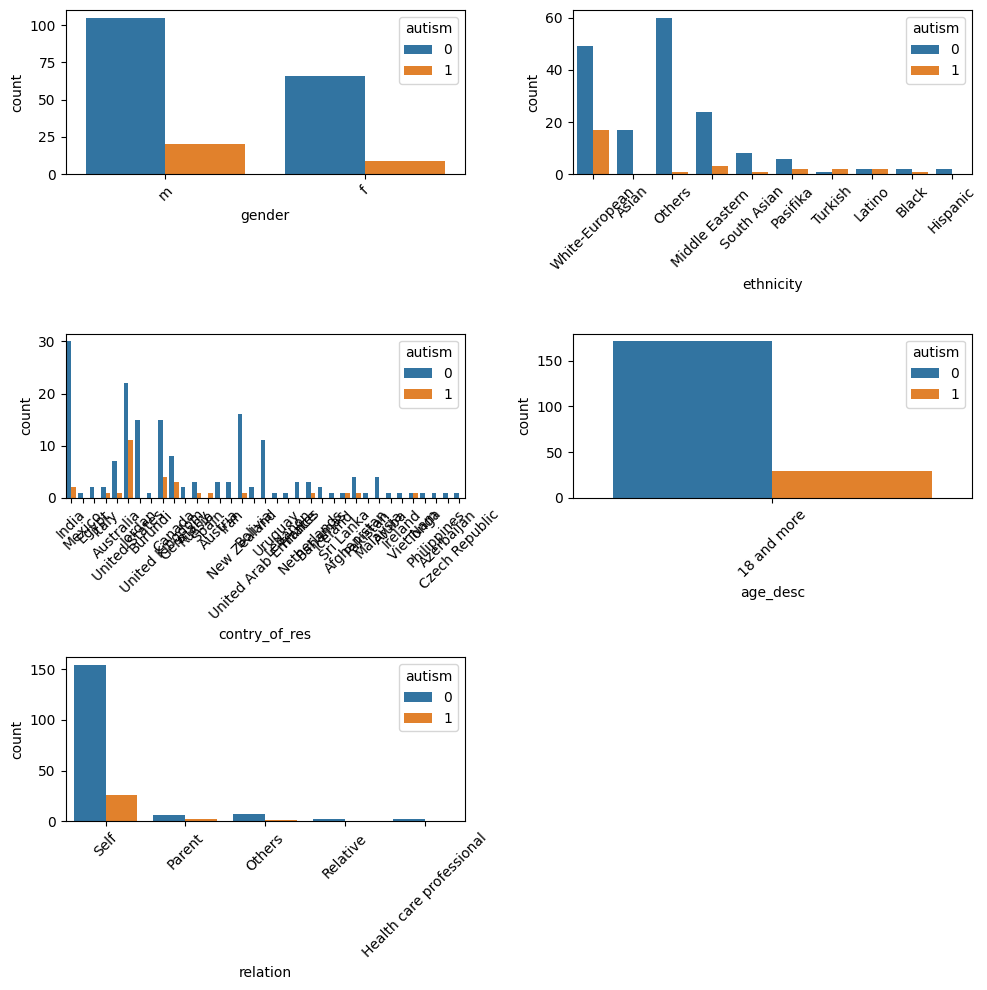

In [15]:
index = 0
plt.figure(figsize=(10,10))
for col in objects:
  index += 1
  plt.subplot(3, 2, index)
  sns.countplot(x=df[col], hue=df['autism'])
  plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

age_desc is of no use since it has only one value, this eill be more clear later when we find correlation.

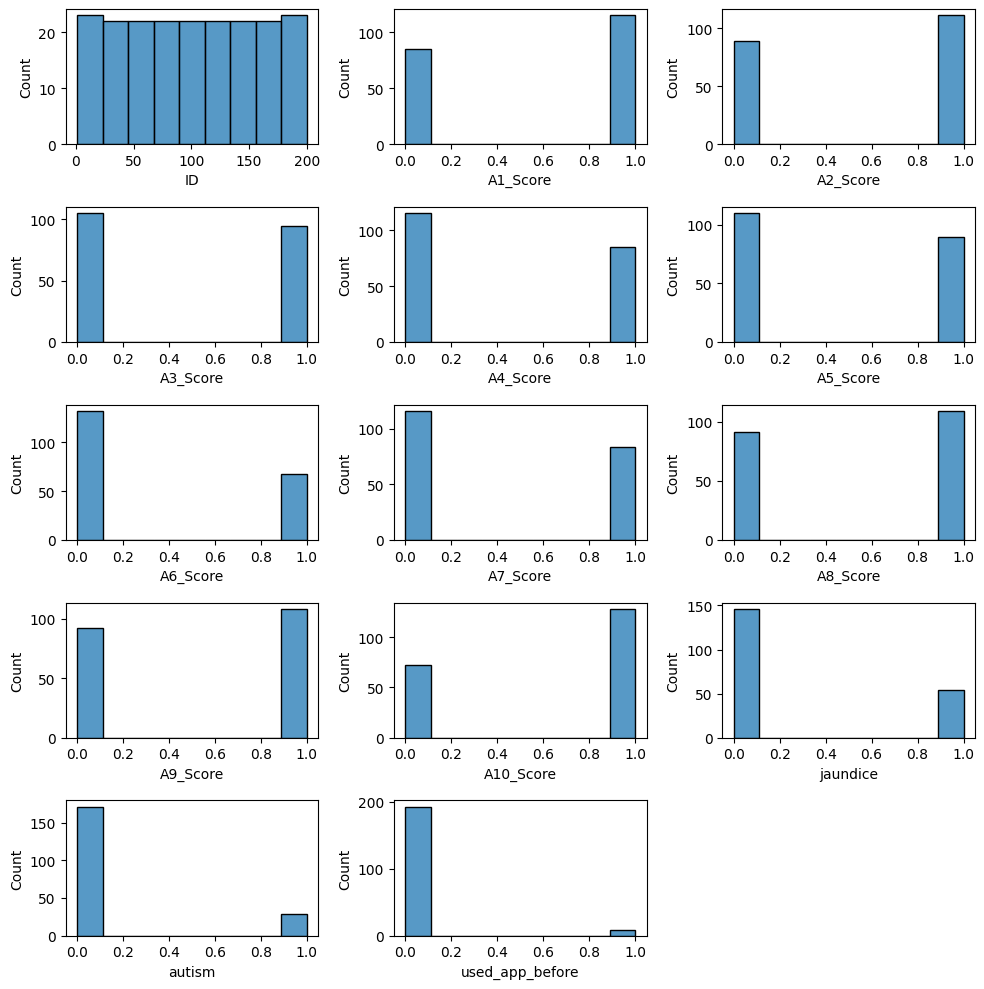

In [16]:
index = 0
plt.figure(figsize=(10,10))
for col in ints:
  index += 1
  plt.subplot(5, 3, index)
  sns.histplot(x=df[col])
  # plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

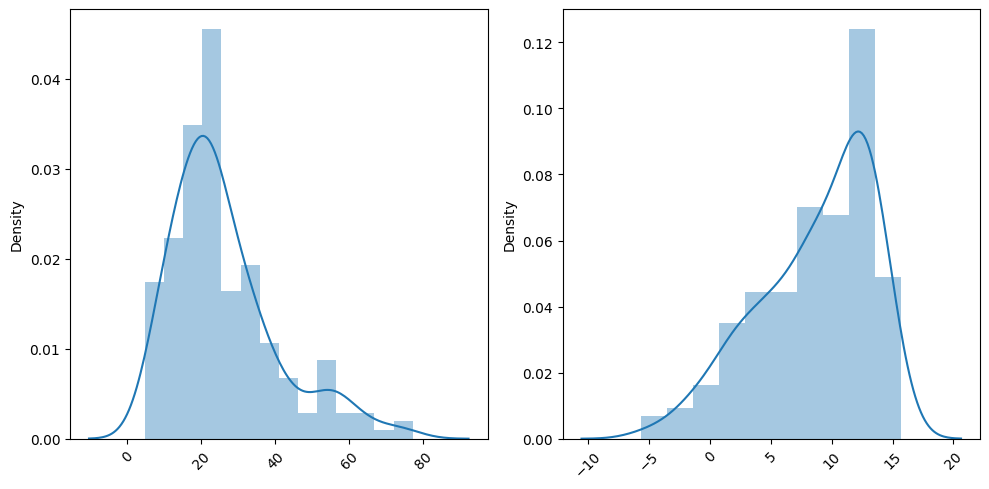

In [17]:
index = 0
plt.figure(figsize=(10,5))
for col in floats:
  index += 1
  plt.subplot(1, 2, index)
  sns.distplot(x=df[col])
  plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

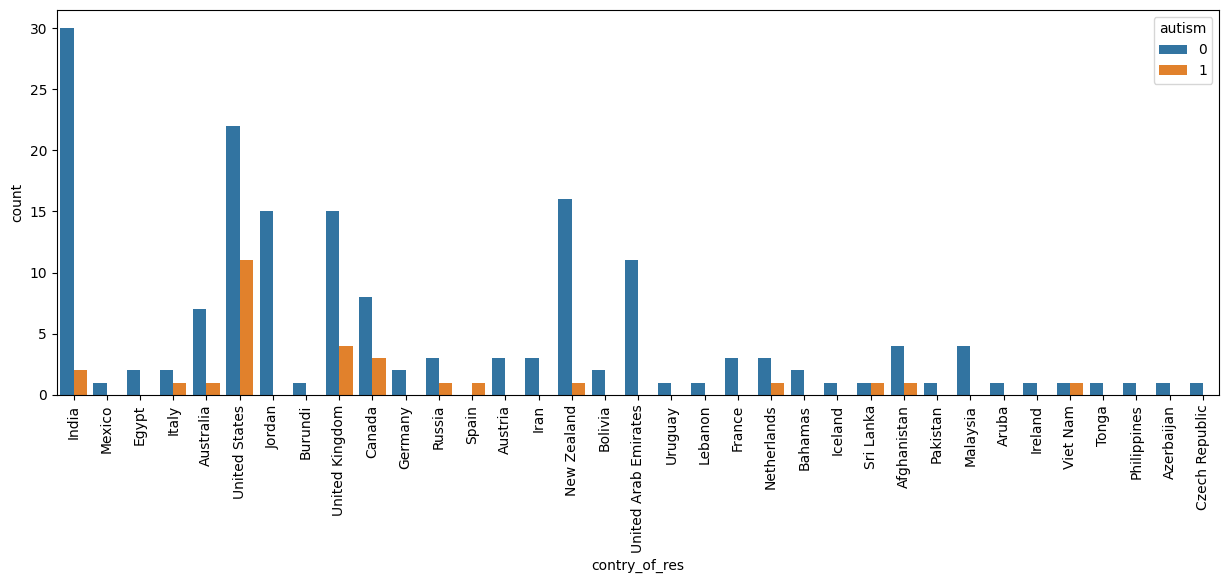

In [18]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='contry_of_res', hue='autism')
plt.xticks(rotation=90)
plt.show()


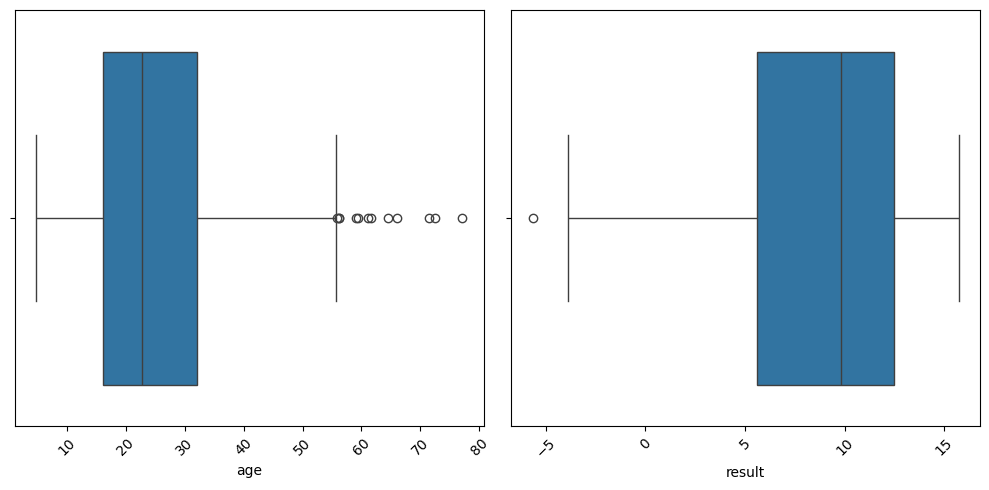

In [19]:
index = 0
plt.figure(figsize=(10,5))
for col in floats:
  index += 1
  plt.subplot(1, 2, index)
  sns.boxplot(x=df[col])
  plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
df = df[df['result']>-5]
df.shape

(199, 21)

In [21]:
#feature Engineering

def convert_age(age):
  if age<12:
    return 'Kid'
  elif age<18:
    return 'Teenager'
  elif age<40:
    return 'Young'
  else:
    return 'Senior'

df['age_group'] = df['age'].apply(convert_age)

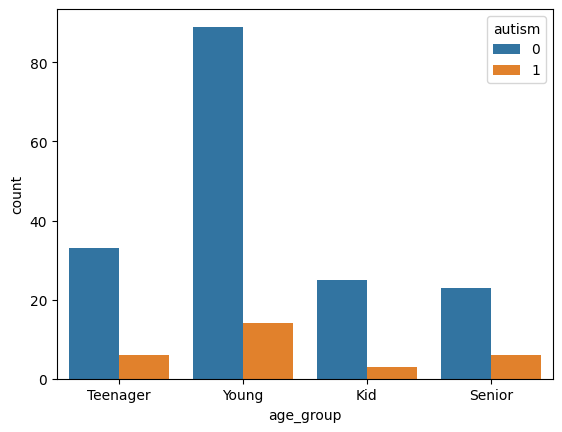

In [22]:
sns.countplot(x=df['age_group'], hue=df['autism'])
plt.show()

From this we can say young people have less chances of getting autism.

In [23]:
def add_feature(data):

  # Creating a column with all values zero
  data['sum_score'] = 0
  for col in data.loc[:,'A1_Score':'A10_Score'].columns:

    # Updating the 'sum_score' value with scores
    # from A1 to A10
    data['sum_score'] += data[col]

  # Creating a random data using the below three columns
  data['ind'] = data['autism'] + data['used_app_before'] + data['jaundice']

  return data

df = add_feature(df)

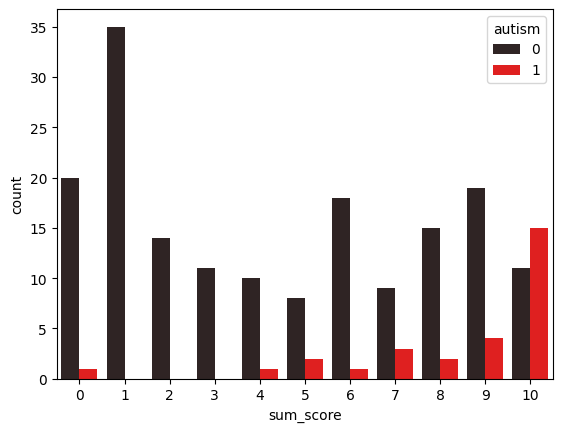

In [24]:
sns.countplot(x=df['sum_score'], hue=df['autism'], color='red')
plt.show()

Higher the sum score higher is the chance of getting autism.

Let's remove skewness from age column using log function.

In [25]:
df['age'] = df['age'].apply(lambda x: np.log(x))

<Axes: xlabel='age', ylabel='Density'>

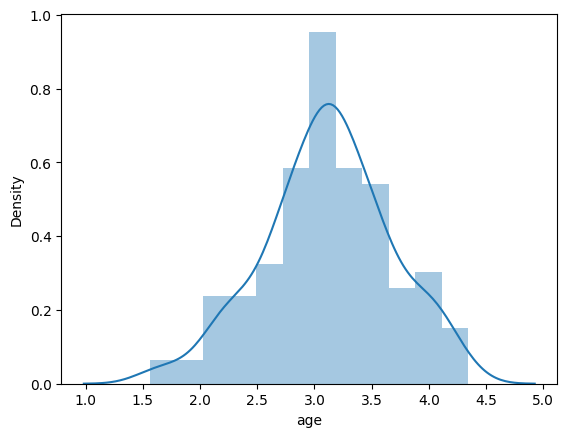

In [26]:
sns.distplot(df['age'])

The skewness is almost removed

<Axes: >

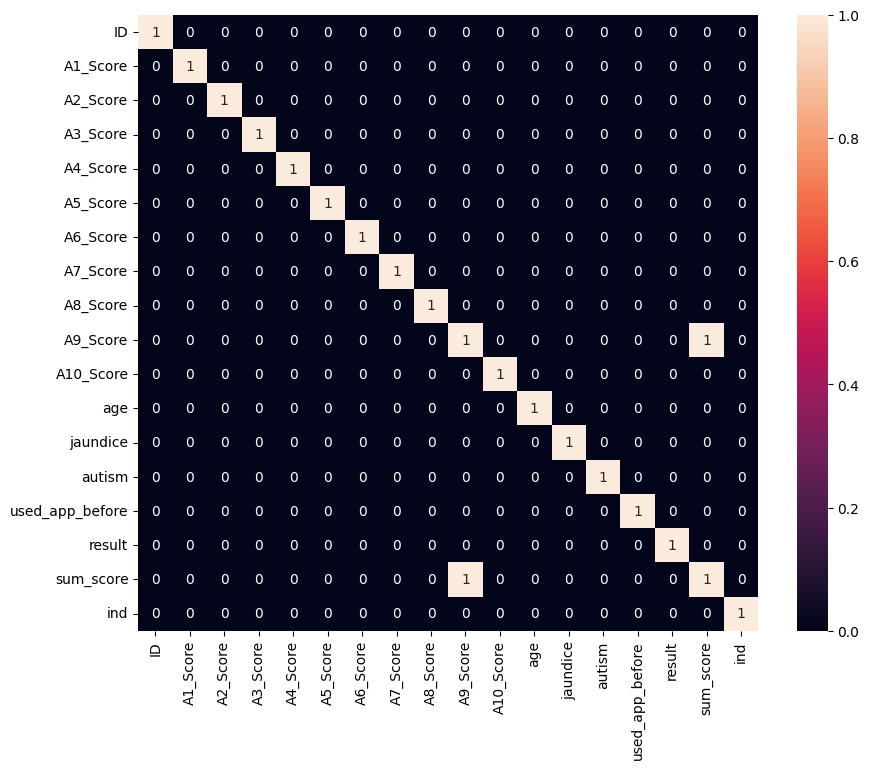

In [27]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True)>0.8, annot=True)

In [28]:
# converting categorical data to numerical
from sklearn.preprocessing import LabelEncoder
for col in objects:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])

In [29]:
print(df.head())

   ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0   1         1         1         0         0         1         1         0   
1   2         1         0         0         0         0         0         0   
2   3         1         1         1         0         1         1         0   
3   4         0         0         0         0         0         0         0   
4   5         0         0         0         1         0         0         0   

   A8_Score  A9_Score  ...  jaundice  autism  contry_of_res  used_app_before  \
0         0         1  ...         1       0             14                0   
1         1         0  ...         0       0             21                0   
2         1         1  ...         1       0             10                0   
3         0         0  ...         0       0             14                0   
4         0         0  ...         0       0             17                0   

      result  age_desc  relation  age_group 

In [30]:
#feature extraction
x = df.drop(['ID','age_desc','used_app_before','autism','age_group'], axis=1)
y = df['autism']

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

ros = RandomOverSampler(sampling_strategy='minority', random_state=0)
x_train, y_train = ros.fit_resample(x_train, y_train)
x_train.shape, y_train.shape

((270, 19), (270,))

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [34]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]

for model in models:
  model.fit(x_train, y_train)
  print(f'{model.__class__.__name__}')
  print("Training Accuracy : ", metrics.accuracy_score(y_train, model.predict(x_train)))
  print("Testing Accuracy : ", metrics.accuracy_score(y_test, model.predict(x_test)))

LogisticRegression
Training Accuracy :  0.9814814814814815
Testing Accuracy :  0.975
XGBClassifier
Training Accuracy :  1.0
Testing Accuracy :  1.0
SVC
Training Accuracy :  0.9962962962962963
Testing Accuracy :  0.975


All models are performing excellently but the best among them is XGBClassifer.

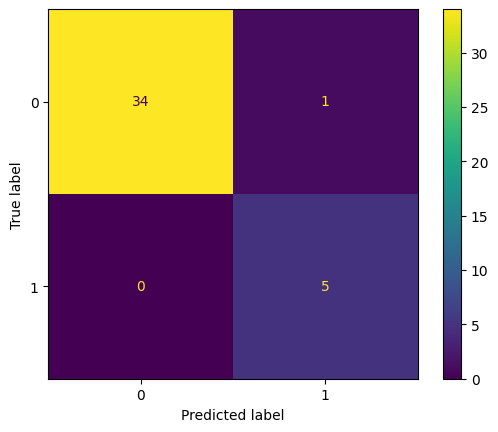

In [37]:
#model Evaluation
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(models[0], x_test, y_test)
plt.show()

In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_test, models[1].predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00         5

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



Thank you for going through my work till the end, feel free to get in touch if you have any questions... :)